In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
from matplotlib import pyplot as plt

/home/sergei/miniconda3/envs/ML/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# loading the dataset
scaler = 1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.array([elem.flatten() / 255. for elem in x_train])
x_test = np.array([elem.flatten() / 255. for elem in x_test])
y_train = np.array([[scaler if i == digit else 0 for i in range(10)] for digit in y_train.flatten()])
y_test = np.array([[scaler if i == digit else 0 for i in range(10)] for digit in y_test.flatten()])

In [3]:
# returns a custom ReLU function with learnable K
all_Ks = []
descriptions = []
def get_act(name = ' '):
    val = K.variable(value = 1, name = str(name))
    all_Ks.append(val)
    def custom_activation(x):
        return K.relu(x * val)
    return custom_activation

In [4]:
# creating a model
all_Ks = []
model = Sequential()
model.add(Dense(10, input_shape = (784, ), activation = get_act(1)))
model.add(Dense(10, input_shape = (784, ), activation = get_act(2)))
model.add(Dense(10, input_shape = (784, ), activation = get_act(3)))

# adding K as trainable parameters
model.layers[-1].trainable_weights.extend(all_Ks)

# training the model
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy', 'mean_squared_error'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 10000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.1004 - acc: 0.1048 - mean_squared_error: 0.1004 - val_loss: 0.0943 - val_acc: 0.1267 - val_mean_squared_error: 0.0943
Epoch 2/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0932 - acc: 0.1374 - mean_squared_error: 0.0932 - val_loss: 0.0915 - val_acc: 0.1644 - val_mean_squared_error: 0.0915
Epoch 3/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0908 - acc: 0.1778 - mean_squared_error: 0.0908 - val_loss: 0.0893 - val_acc: 0.2041 - val_mean_squared_error: 0.0893
Epoch 4/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0886 - acc: 0.2239 - mean_squared_error: 0.0886 - val_loss: 0.0872 - val_acc: 0.2604 - val_mean_squared_error: 0.0872
Epoch 5/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0866 - acc: 0.2810 - mean_squared_error: 0.0866 - val_loss: 0.0854 -

60000/60000 [==============================] - 1s 17us/step - loss: 0.0385 - acc: 0.7868 - mean_squared_error: 0.0385 - val_loss: 0.0377 - val_acc: 0.8033 - val_mean_squared_error: 0.0377
Epoch 42/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.0378 - acc: 0.7916 - mean_squared_error: 0.0378 - val_loss: 0.0369 - val_acc: 0.8104 - val_mean_squared_error: 0.0369
Epoch 43/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0372 - acc: 0.7947 - mean_squared_error: 0.0372 - val_loss: 0.0367 - val_acc: 0.8085 - val_mean_squared_error: 0.0367
Epoch 44/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0366 - acc: 0.7994 - mean_squared_error: 0.0366 - val_loss: 0.0356 - val_acc: 0.8122 - val_mean_squared_error: 0.0356
Epoch 45/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0356 - acc: 0.8088 - mean_squared_error: 0.0356 - val_loss: 0.0353 - val_acc: 0.8124 - val_mean_squared_error: 0.0353
Epoch 46

Epoch 82/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0254 - acc: 0.8693 - mean_squared_error: 0.0254 - val_loss: 0.0245 - val_acc: 0.8745 - val_mean_squared_error: 0.0245
Epoch 83/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.0250 - acc: 0.8706 - mean_squared_error: 0.0250 - val_loss: 0.0239 - val_acc: 0.8769 - val_mean_squared_error: 0.0239
Epoch 84/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.0246 - acc: 0.8733 - mean_squared_error: 0.0246 - val_loss: 0.0237 - val_acc: 0.8776 - val_mean_squared_error: 0.0237
Epoch 85/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.0246 - acc: 0.8732 - mean_squared_error: 0.0246 - val_loss: 0.0241 - val_acc: 0.8755 - val_mean_squared_error: 0.0241
Epoch 86/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.0247 - acc: 0.8729 - mean_squared_error: 0.0247 - val_loss: 0.0237 - val_acc: 0.8777 - val_mean_squared_error: 0.

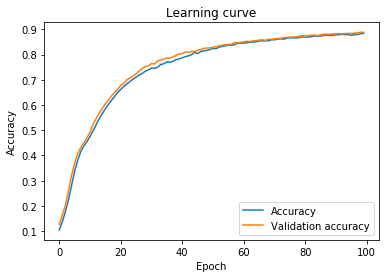

In [5]:
# showing the learning curve
plt.figure()
plt.title('Learning curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'], label = 'Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation accuracy')
plt.legend()
plt.show()

In [6]:
# showing the Lipschitz coefficients K
[K.get_value(x) for x in all_Ks]

[1.1291296, 1.1425389, 1.1780086]

In [9]:
# names
[x.name for x in all_Ks]

['1:0', '2:0', '3:0']